In [1]:
from scipy import signal
def lowpass_filt(t,noisy_signal):
    fs = 100 # Sampling frequency

    fc = 25 # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(3, w, 'low')
    y = signal.filtfilt(b, a, noisy_signal)
 
    '''
    plt.figure
    plt.ylabel('Volt(1/1024V)')
    plt.xlabel('Time(s)')

    plt.plot(t, noisy_signal,'lightseagreen')
    plt.plot(t,y, 'palevioletred',alpha=0.8)
    plt.legend(('noisy signal', 'Filterd'), loc='best')
    plt.show()
    '''
    return y
    


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
#matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


#df = pd.read_csv(os.path.join(os.getcwd(),'data/TRAIN00.TSV'), delim_whitespace=True)
#df.head()
#df = df[df.Time > 1500000]

In [3]:
activity = ["eat", 'wipe', 'type', 'write', 'fold', 'peg']

df_list = pd.DataFrame({})
for i,act in enumerate(activity):
    #print("%d:%s.csv" % (i,act))
    df = pd.read_csv(os.path.join(os.getcwd(),'data/ishitsubo/right/' + act + '.TSV'), delim_whitespace=True)
    df = df[df['Time'] < 300000]
    
    df["Time"]+= 300000 * i 
    df_list = pd.concat([df_list, df])


In [4]:
df = df_list

In [5]:
df.Time = df.Time / 1000
df["Filterd"] = lowpass_filt(df.Time,df["Volt"])
df["Filt_X"] = lowpass_filt(df.Time,df["Xaxis"])
df["Filt_Y"] = lowpass_filt(df.Time,df["Yaxis"])
df["Filt_Z"] = lowpass_filt(df.Time,df["Zaxis"])
df.head()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z
0,0.200,305,342,604,426,305.000301,341.999630,603.999621,426.000172
1,0.220,304,337,604,425,304.206502,337.719977,604.595591,424.805893
2,0.243,304,336,605,424,303.893472,335.999206,604.179008,424.379839
3,0.266,304,337,602,425,303.934715,336.237149,602.527472,424.702767
4,0.289,304,337,601,425,304.021458,337.086351,600.653687,425.067033


In [6]:
df.Time = df.Time * 1000000000

df.index = pd.DatetimeIndex(df.Time,dtype='datetime64[ms]', freq=None)

len(df)
df.head()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z
Time,,,,,,,,,
1970-01-01 00:00:00.200,200000000.0,305,342,604,426,305.000301,341.999630,603.999621,426.000172
1970-01-01 00:00:00.220,220000000.0,304,337,604,425,304.206502,337.719977,604.595591,424.805893
1970-01-01 00:00:00.243,243000000.0,304,336,605,424,303.893472,335.999206,604.179008,424.379839
1970-01-01 00:00:00.266,266000000.0,304,337,602,425,303.934715,336.237149,602.527472,424.702767
1970-01-01 00:00:00.289,289000000.0,304,337,601,425,304.021458,337.086351,600.653687,425.067033


In [7]:
df = df.resample('1L').interpolate()

#df = df.drop("Time",axis=1)
#df.index = df.index.time
df.head()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z
Time,,,,,,,,,
1970-01-01 00:00:00.200,200000000.0,305.00,342.00,604.0,426.00,305.000301,341.999630,603.999621,426.000172
1970-01-01 00:00:00.201,201000000.0,304.95,341.75,604.0,425.95,304.960611,341.785647,604.029419,425.940458
1970-01-01 00:00:00.202,202000000.0,304.90,341.50,604.0,425.90,304.920921,341.571664,604.059218,425.880744
1970-01-01 00:00:00.203,203000000.0,304.85,341.25,604.0,425.85,304.881231,341.357682,604.089016,425.821030
1970-01-01 00:00:00.204,204000000.0,304.80,341.00,604.0,425.80,304.841541,341.143699,604.118815,425.761316


In [8]:
X = pd.DataFrame([330,60])

min = 0
max = 5
y = pd.DataFrame([min,max])
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)


In [9]:
dist_func = lambda x: x * regr.coef_ + regr.intercept_
df["Dist"] = df["Volt"].map(dist_func)
df["Dist"] = df["Dist"].values
df["Dist"] = df["Dist"].map(lambda x : min if x < min else (max if x > max else x))
df["Theta"] = df["Dist"].map(lambda x : math.degrees(math.acos(x/5.5)))
df["Angle"] = df["Theta"].map(lambda x : x*x/90)
df["Diff"] = df["Angle"].diff()

df["Fabs"] = np.fabs(df["Diff"])
df["Sum"] = df["Fabs"].cumsum()

df.Time = df.Time /1000000000


In [10]:
#Axis to accelerometry
X = pd.DataFrame([250,550])
y = pd.DataFrame([-9.8,9.8])
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)
acc_func = lambda x: x * regr.coef_ + regr.intercept_
df["Acc_X"] = df["Filt_X"].map(dist_func)
df["Acc_Y"] = df["Filt_Y"].map(dist_func)
df["Acc_Z"] = df["Filt_Z"].map(dist_func)

In [11]:
df = df[df.Time > 0]
df

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z,Dist,Theta,Angle,Diff,Fabs,Sum,Acc_X,Acc_Y,Acc_Z
Time,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.200,0.200,305.000000,342.000000,604.000000,426.000000,305.000301,341.999630,603.999621,426.000172,[[0.4629629629629628]],85.171409,80.601877,NaN,NaN,NaN,[[-3.7893575291219044]],[[13.327975206086737]],[[1.6986778802615916]]
1970-01-01 00:00:00.201,0.201,304.950000,341.750000,604.000000,425.950000,304.960611,341.785647,604.029419,425.940458,[[0.4638888888888886]],85.161729,80.583557,-0.018321,0.018321,0.018321,[[-3.8033377262509056]],[[13.329922041563325]],[[1.6947765710851073]]
1970-01-01 00:00:00.202,0.202,304.900000,341.500000,604.000000,425.900000,304.920921,341.571664,604.059218,425.880744,[[0.46481481481481524]],85.152049,80.565238,-0.018319,0.018319,0.036639,[[-3.8173179233799033]],[[13.331868877039913]],[[1.690875261908623]]
1970-01-01 00:00:00.203,0.203,304.850000,341.250000,604.000000,425.850000,304.881231,341.357682,604.089016,425.821030,[[0.4657407407407401]],85.142368,80.546921,-0.018317,0.018317,0.054956,[[-3.8312981205089045]],[[13.3338157125165]],[[1.6869739527321386]]
1970-01-01 00:00:00.204,0.204,304.800000,341.000000,604.000000,425.800000,304.841541,341.143699,604.118815,425.761316,[[0.4666666666666659]],85.132688,80.528606,-0.018315,0.018315,0.073272,[[-3.845278317637902]],[[13.335762547993088]],[[1.6830726435556542]]
1970-01-01 00:00:00.205,0.205,304.750000,340.750000,604.000000,425.750000,304.801851,340.929717,604.148613,425.701602,[[0.46759259259259256]],85.123007,80.510293,-0.018313,0.018313,0.091585,[[-3.8592585147669]],[[13.337709383469669]],[[1.6791713343791699]]
1970-01-01 00:00:00.206,0.206,304.700000,340.500000,604.000000,425.700000,304.762162,340.715734,604.178412,425.641888,[[0.46851851851851833]],85.113326,80.491981,-0.018312,0.018312,0.109896,[[-3.873238711895901]],[[13.339656218946256]],[[1.6752700252026855]]
1970-01-01 00:00:00.207,0.207,304.650000,340.250000,604.000000,425.650000,304.722472,340.501751,604.208210,425.582174,[[0.469444444444445]],85.103645,80.473671,-0.018310,0.018310,0.128206,[[-3.8872189090248987]],[[13.341603054422844]],[[1.6713687160262012]]
1970-01-01 00:00:00.208,0.208,304.600000,340.000000,604.000000,425.600000,304.682782,340.287769,604.238009,425.522460,[[0.4703703703703699]],85.093964,80.455363,-0.018308,0.018308,0.146514,[[-3.9011991061538964]],[[13.343549889899432]],[[1.6674674068497168]]


([<matplotlib.axis.XTick at 0x11d3238d0>,
 <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


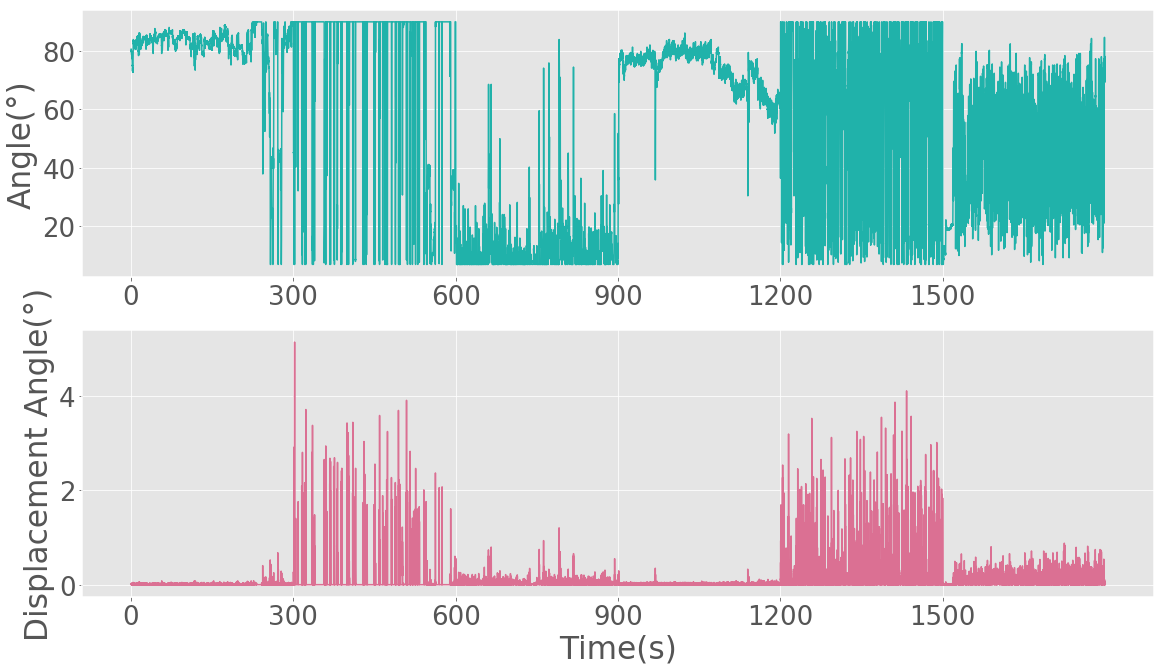

In [12]:
plt.subplot(2,1,1)
plt.plot(df.Time,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")
plt.xticks([0,300,600,900,1200,1500])

plt.subplot(2,1,2)
plt.plot(df.Time,df.Fabs,'palevioletred')
plt.ylabel("Displacement Angle(°)")
plt.xlabel("Time(s)")
plt.xticks([0,300,600,900,1200,1500])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


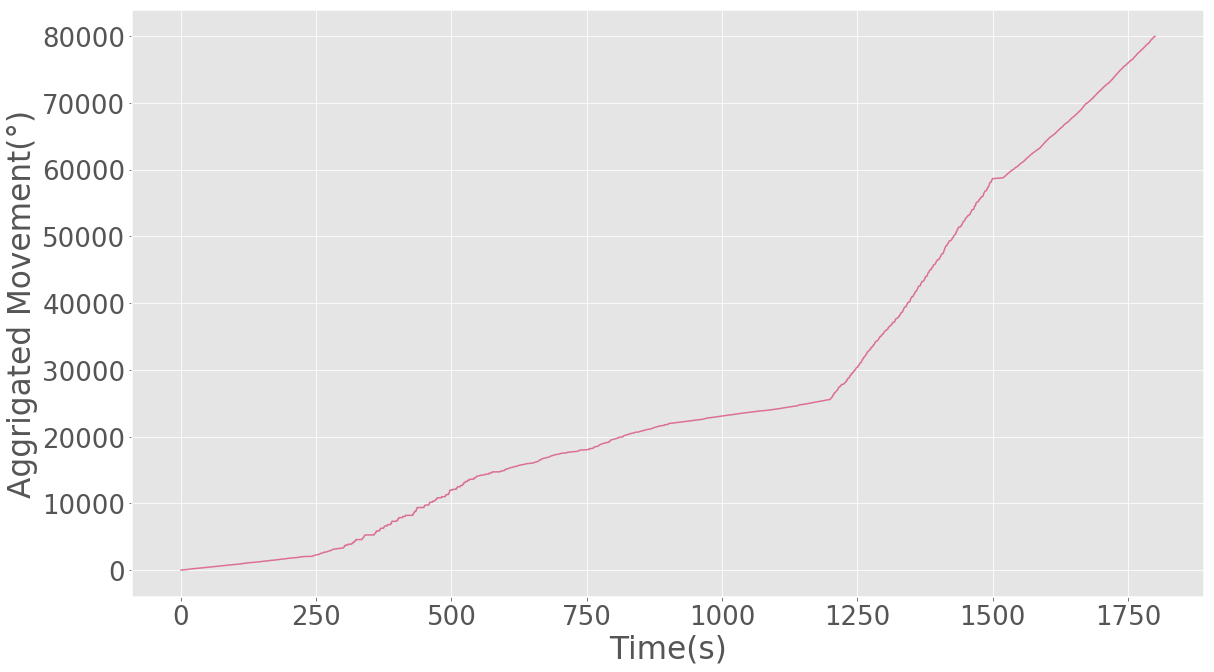

In [13]:
plt.plot(df.Time,df.Sum,'palevioletred')
plt.ylabel("Aggrigated Movement(°)")
plt.xlabel("Time(s)")



In [14]:
df.tail()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z,Dist,Theta,Angle,Diff,Fabs,Sum,Acc_X,Acc_Y,Acc_Z
Time,,,,,,,,,,,,,,,,,,
1970-01-01 00:29:59.988,1799.988,297.666667,323.833333,530.00,516.00,297.663569,324.738853,530.180868,515.905022,[[0.598765432098765]],83.750025,77.934074,0.030096,0.030096,79935.819876,[[-4.917061609953624]],[[8.5051500242602]],[[7.572461447769154]]
1970-01-01 00:29:59.989,1799.989,297.750000,324.375000,530.25,515.75,297.747658,325.055904,530.386217,515.677560,[[0.5972222222222223]],83.766197,77.964175,0.030101,0.030101,79935.849977,[[-4.8963476321285455]],[[8.518566163441879]],[[7.557600600695121]]
1970-01-01 00:29:59.990,1799.990,297.833333,324.916667,530.50,515.50,297.831747,325.372954,530.591566,515.450098,[[0.5956790123456788]],83.782369,77.994281,0.030106,0.030106,79935.880083,[[-4.875633654303471]],[[8.531982302623565]],[[7.542739753621081]]
1970-01-01 00:29:59.991,1799.991,297.916667,325.458333,530.75,515.25,297.915836,325.690005,530.796915,515.222636,[[0.5941358024691352]],83.798540,78.024392,0.030111,0.030111,79935.910194,[[-4.854919676478392]],[[8.545398441805244]],[[7.527878906547048]]
1970-01-01 00:29:59.992,1799.992,298.000000,326.000000,531.00,515.00,297.999924,326.007056,531.002264,514.995174,[[0.5925925925925926]],83.814710,78.054508,0.030116,0.030116,79935.940309,[[-4.834205698653314]],[[8.55881458098693]],[[7.5130180594730085]]


In [15]:
df.describe()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z,Theta,Angle,Diff,Fabs,Sum
count,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799793e+06,1.799792e+06,1.799792e+06,1.799792e+06
mean,9.000960e+02,2.375695e+02,3.901309e+02,5.352968e+02,5.838705e+02,2.375724e+02,3.901335e+02,5.352905e+02,5.838822e+02,6.864286e+01,5.820535e+01,-1.415369e-06,4.441399e-02,2.711627e+04
std,5.195556e+02,1.059723e+02,5.063247e+01,6.634329e+01,9.007443e+01,1.059371e+02,4.971508e+01,6.614389e+01,8.969237e+01,2.294863e+01,3.043295e+01,1.494484e-01,1.426963e-01,2.275186e+04
min,2.000000e-01,3.500000e+01,5.300000e+01,1.940000e+02,2.600000e+02,2.790089e+01,1.772825e+02,2.981389e+02,2.595065e+02,2.461998e+01,6.734925e+00,-3.686269e+00,0.000000e+00,1.832061e-02
25%,4.501480e+02,1.307500e+02,3.452500e+02,4.954483e+02,5.458750e+02,1.310163e+02,3.446632e+02,4.955520e+02,5.462973e+02,4.786533e+01,2.545656e+01,-1.136009e-02,0.000000e+00,9.552785e+03
50%,9.000960e+02,2.810000e+02,3.912609e+02,5.192083e+02,6.040000e+02,2.808205e+02,3.916910e+02,5.189269e+02,6.043353e+02,8.050374e+01,7.200947e+01,0.000000e+00,1.248066e-02,2.184587e+04
75%,1.350044e+03,3.140000e+02,4.245000e+02,5.677500e+02,6.530000e+02,3.139664e+02,4.243113e+02,5.674749e+02,6.535681e+02,8.691186e+01,8.392969e+01,1.359963e-02,3.093415e-02,4.084566e+04
max,1.799992e+03,4.100000e+02,6.370000e+02,7.770000e+02,1.023000e+03,4.111399e+02,6.339405e+02,7.595806e+02,9.174764e+02,9.000000e+01,9.000000e+01,5.131899e+00,5.131899e+00,7.993594e+04


In [16]:
df_acc = df[["Acc_X","Acc_Y","Acc_Z"]]

df_acc_diff = df_acc.diff()
df[["Diff_X","Diff_Y","Diff_Z"]] = df_acc_diff
df_acc
df["Norm"] = np.sqrt(np.square(df_acc_diff).sum(axis=1))


In [17]:
df2 = df.resample('300S').sum()
df2.index = df2.index.time
df3 = df2[["Fabs","Norm"]]
df3
df4 = df3

In [18]:
df3.drop(df3.index)
df3.index = activity
df3.T

,eat,wipe,type,write,fold,peg
Fabs,3312.539097,11728.859818,6786.216135,3727.240858,33080.959337,21300.125064
Norm,6121.833482,13348.945245,14766.024592,6942.076258,20576.312450,12841.482248


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


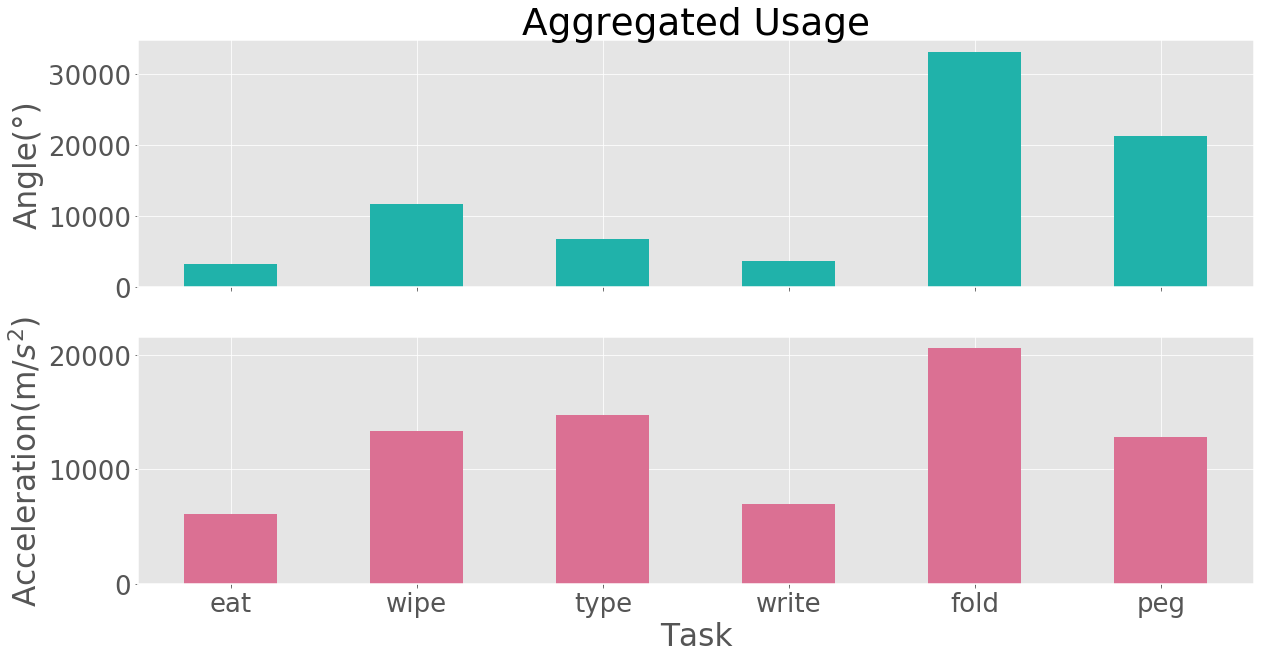

In [19]:
ax = df3.plot.bar(color=['lightseagreen','palevioletred'],subplots=True,figsize=(20,10))
ax[0].set_title('Aggregated Usage')
ax[0].set_ylabel('Angle(°)')
ax[0].get_legend().remove()

ax[1].set_title('')
ax[1].set_ylabel('Acceleration(m/$s^2$)')
ax[1].get_legend().remove()

plt.xlabel("Task")
plt.xticks(rotation=0)


In [20]:
#df4["Task"] = activity
df4

,Fabs,Norm
eat,3312.539097,6121.833482
wipe,11728.859818,13348.945245
type,6786.216135,14766.024592
write,3727.240858,6942.076258
fold,33080.959337,20576.312450
peg,21300.125064,12841.482248


In [21]:
df.index = df.index.time

([<matplotlib.axis.XTick at 0x1a74ca668>,
 <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


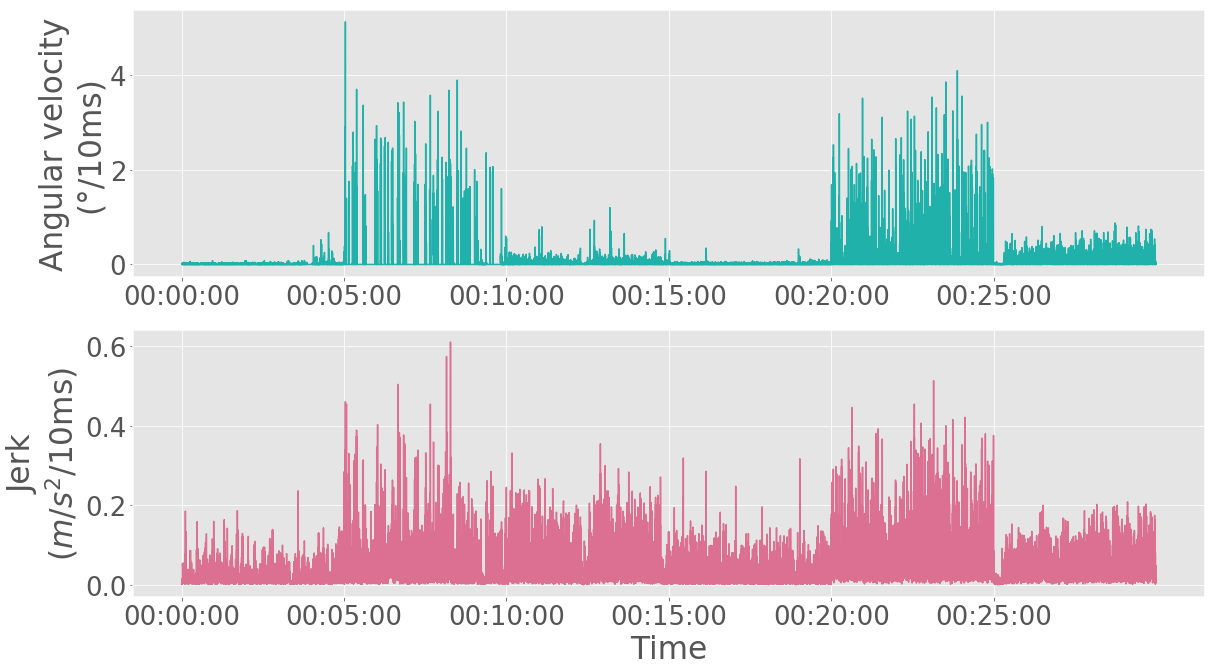

In [22]:
plt.subplot(2,1,1)
plt.plot(df.index,df.Fabs,'lightseagreen')
plt.ylabel("Angular velocity\n(°/10ms)")
plt.xlabel("")
plt.xticks([0,300,600,900,1200,1500])

plt.subplot(2,1,2)
plt.plot(df.index,df.Norm,'palevioletred')
plt.ylabel("Jerk\n($m/s^2$/10ms)")
plt.xlabel("Time")
plt.xticks([0,300,600,900,1200,1500])



In [23]:
df_acc_diff.index = df_acc_diff.index.time

([<matplotlib.axis.XTick at 0x1906eacf8>,
 <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


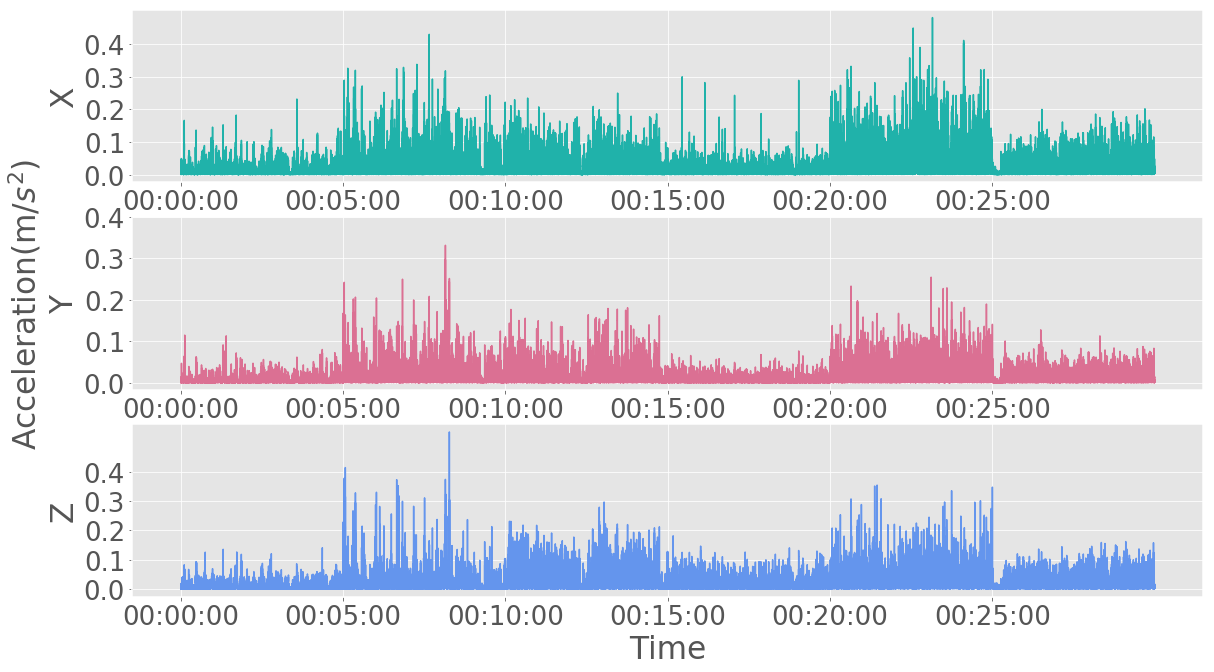

In [24]:
df_acc_diff=df_acc_diff.astype(float)
df_acc_diff["Fabs_X"] = np.fabs(df_acc_diff.Acc_X)
df_acc_diff["Fabs_Y"] = np.fabs(df_acc_diff.Acc_Y)
df_acc_diff["Fabs_Z"] = np.fabs(df_acc_diff.Acc_Z)

plt.subplot(3,1,1)
plt.plot(df_acc_diff.index,df_acc_diff.Fabs_X,'lightseagreen')
plt.ylabel("X")
plt.xlabel("")
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.xticks([0,300,600,900,1200,1500])

plt.subplot(3,1,2)
plt.plot(df_acc_diff.index,df_acc_diff.Fabs_Y,'palevioletred')
plt.ylabel("Acceleration(m/$s^2$)\nY")
plt.xlabel("")
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.xticks([0,300,600,900,1200,1500])

plt.subplot(3,1,3)
plt.plot(df_acc_diff.index,df_acc_diff.Fabs_Z,'cornflowerblue')
plt.ylabel("Z")
plt.xlabel("Time")
plt.yticks([0,0.1,0.2,0.3,0.4])
plt.xticks([0,300,600,900,1200,1500])



/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


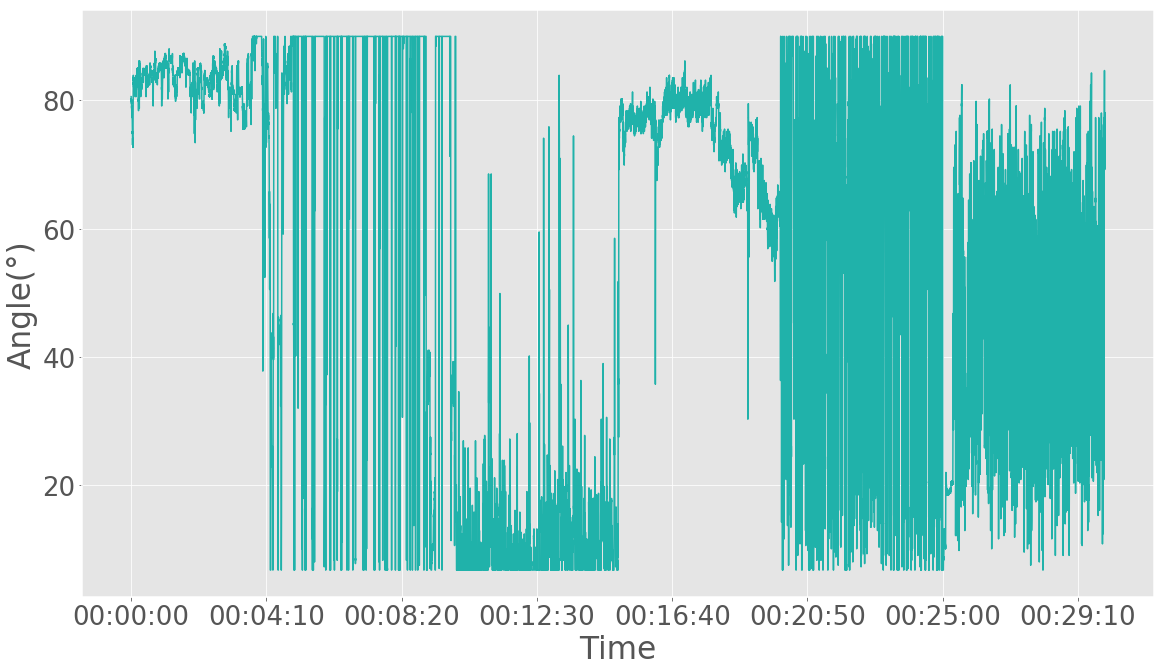

In [25]:
plt.plot(df.index,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")
plt.xlabel("Time")

#plt.xticks([0,300,600,900,1200,1500])
